In [1]:
import numpy as np

In [2]:
def generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length):
    if num_sides < 3:
        raise ValueError("A polygon must have at least 3 sides.")

    side_lengths = np.random.uniform(min_side_length, max_side_length, num_sides)
    total_perimeter = np.sum(side_lengths)
    angles = np.random.uniform(0, 360, num_sides)
    cumulative_angles = np.cumsum(angles)
    x_coords = total_perimeter * np.cos(np.radians(cumulative_angles))
    y_coords = total_perimeter * np.sin(np.radians(cumulative_angles))
    x_coords = np.append(x_coords, x_coords[0])
    y_coords = np.append(y_coords, y_coords[0])

    for i in range(num_sides):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % num_sides], y_coords[(i + 1) % num_sides]
        for j in range(i + 2, num_sides):
            x3, y3 = x_coords[j], y_coords[j]
            x4, y4 = x_coords[(j + 1) % num_sides], y_coords[(j + 1) % num_sides]
            if do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
                return generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

    return x_coords, y_coords


def do_segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    def cross_product(x1, y1, x2, y2):
        return x1 * y2 - x2 * y1

    d1 = cross_product(x4 - x3, y4 - y3, x1 - x3, y1 - y3)
    d2 = cross_product(x4 - x3, y4 - y3, x2 - x3, y2 - y3)
    d3 = cross_product(x2 - x1, y2 - y1, x3 - x1, y3 - y1)
    d4 = cross_product(x2 - x1, y2 - y1, x4 - x1, y4 - y1)

    if (d1 * d2 < 0) and (d3 * d4 < 0):
        return True
    return False


def add_noise_to_polygon(polygon_points, noise_factor=0.1):
    x_coords, y_coords = zip(*polygon_points)
    noise_x = np.random.uniform(-noise_factor, noise_factor, len(x_coords))
    noise_y = np.random.uniform(-noise_factor, noise_factor, len(y_coords))

    x_coords_noisy = [x + noise for x, noise in zip(x_coords, noise_x)]
    y_coords_noisy = [y + noise for y, noise in zip(y_coords, noise_y)]

    return list(zip(x_coords_noisy, y_coords_noisy))


def build_polygon_from_points(x_coords, y_coords):
    min_x, max_x = min(x_coords), max(x_coords)
    min_y, max_y = min(y_coords), max(y_coords)

    rectangle_points = [(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)]
    return rectangle_points

In [3]:
num_sides = 5
min_side_length = 1
max_side_length = 5
x_coords, y_coords = generate_random_nonintersecting_polygon(num_sides, min_side_length, max_side_length)

license_area_poly = list(zip(x_coords * 5000, y_coords * 500))
license_area_poly

[(21848.964812916907, 9559.563402584188),
 (58047.38564331788, 7903.419214602444),
 (97904.27884565078, -553.6667943071409),
 (-15820.721747477677, -9677.606765924966),
 (-85611.2671869684, 4781.854701724307),
 (21848.964812916907, 9559.563402584188)]

In [6]:
from qa_qc_lib.tests.seismic_tests.seismic import QA_QC_seismic

file_path = 'data/seismic_data/Временной куб NP cropped'
surfaces_path_list = ['data/seismic_data/TWT_NP4', 'data/seismic_data/TWT_NP5', 'data/seismic_data/NP4_TVD_TOP',
                      'data/seismic_data/NP4_TWT_TOP']

seism_data_qa_qc = QA_QC_seismic(file_path=file_path, surfaces_path_list=surfaces_path_list,faults_file_path='data/seismic_data/Faults TVD'
                                 )


FileNotFoundError: [Errno 2] No such file or directory

In [5]:
# В этой ячейке происходит симуляци трех сценариев при работе с полигоном лиц. учаска
# Первая строка - тест пройдет, то есть куб входит в границы лиц. участка; вторая тест не запустится; третья нест провалится

seism_data_qa_qc.license_area_poly = add_noise_to_polygon(
    build_polygon_from_points(seism_data_qa_qc.coordinate_x, seism_data_qa_qc.coordinate_y), noise_factor=10000)
#seism_data_qa_qc.license_area_poly = None
#seism_data_qa_qc.license_area_poly = license_area_poly

In [6]:
test_names = seism_data_qa_qc.get_list_of_tests()
test_names

['test_coordinate_validation',
 'test_edge_zone_evaluation',
 'test_faults_location_validation',
 'test_miss_traces',
 'test_monotony',
 'test_pillar_quantity',
 'test_surfaces_dept_validation',
 'test_surfaces_location_validation',
 'test_surfaces_values_validation']

In [ ]:
result = seism_data_qa_qc.start_tests(test_names)

Оценивает вхождение сейсмического куба в полигон лицензионного участка

In [ ]:
seism_data_qa_qc.test_coordinate_validation()

Выявление границы краевой зоны

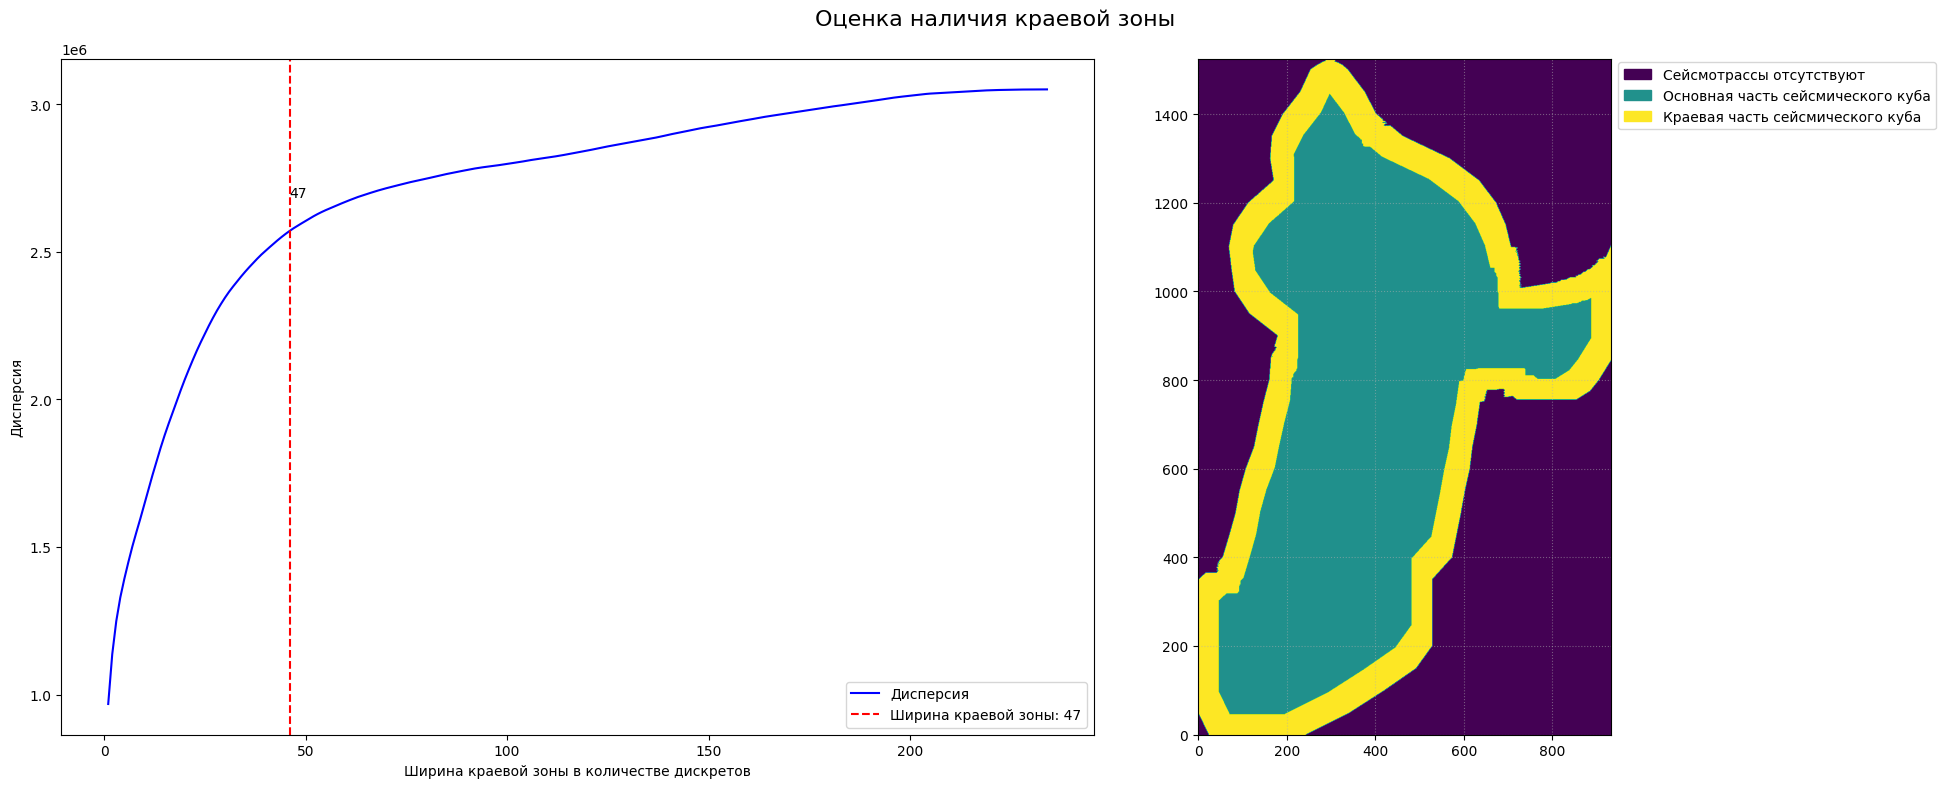


------------------------------------------------------------------------------------


{'variance_list': [968121.3,
  1136706.4,
  1248859.2,
  1329078.4,
  1391949.0,
  1448637.5,
  1501948.6,
  1550399.9,
  1597219.8,
  1646500.6,
  1695386.5,
  1743837.0,
  1790297.6,
  1835450.4,
  1878041.0,
  1917707.2,
  1955843.1,
  1994064.5,
  2031050.9,
  2066939.1,
  2100768.5,
  2133464.2,
  2164907.0,
  2194322.8,
  2222426.2,
  2249925.5,
  2275988.2,
  2300620.2,
  2323290.8,
  2344601.2,
  2364309.8,
  2382231.8,
  2399283.2,
  2416161.8,
  2432190.0,
  2447454.5,
  2462026.0,
  2476424.5,
  2489989.0,
  2502484.8,
  2514535.5,
  2526587.5,
  2538230.2,
  2549423.0,
  2560029.8,
  2569974.0,
  2579294.8,
  2587865.0,
  2596066.8,
  2604288.8,
  2612413.5,
  2620314.0,
  2627681.2,
  2634479.8,
  2640807.2,
  2646682.8,
  2652407.8,
  2658226.5,
  2664031.2,
  2669634.5,
  2675036.8,
  2680317.5,
  2685372.5,
  2689944.5,
  2694370.2,
  2698788.5,
  2703088.5,
  2707246.8,
  2711160.0,
  2714877.5,
  2718463.0,
  2721929.0,
  2725364.2,
  2728801.2,
  2732254.5,
  2735567

In [11]:
seism_data_qa_qc.test_edge_zone_evaluation()

Проверка положения плоскости разлома на глубинном сейсмическом кубе

In [ ]:
seism_data_qa_qc.test_faults_location_validation()

Проверка положения структурной карты на глубинном сейсмическом кубе

In [ ]:
seism_data_qa_qc.test_surfaces_location_validation()

Проверка физичности значений амплитуд на сейсмическом кубе. 

Абсолютно все значения амплитуд по всей сейсмотрассе = 0

In [ ]:
seism_data_qa_qc.test_miss_traces()

Проверка физичности значений времени/глубины на сейсмическом кубе, проверяет на монотонное возрастание по всей оси.

In [ ]:
seism_data_qa_qc.test_monotony()

Проверка корректности пикировки отражающего горизонта. 

Отражающий горизонт пересекает сейсмический куб в значениях амплитуд разного знака. Нет значительного преобладания амплитуд одного знака

In [ ]:
seism_data_qa_qc.test_surfaces_values_validation()

Проверка на пересечение поверхностей кровли и подошвы

In [ ]:
seism_data_qa_qc.test_surfaces_dept_validation()

Поиск разломов пилар в котором состоит из одной точки, что является ошибкой

In [ ]:
seism_data_qa_qc.test_pillar_quantity()

Формирование отчета в виде текстового файла

In [ ]:
seism_data_qa_qc.generate_test_report(file_name='test_report_seismic')